In [46]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dates=pd.date_range('2016-05-01','2016-05-07')
dates

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07'],
              dtype='datetime64[ns]', freq='D')

In [23]:
tmp1=pd.Series([80,92,82,85,97,84,78],index=dates)
tmp1

2016-05-01    80
2016-05-02    92
2016-05-03    82
2016-05-04    85
2016-05-05    97
2016-05-06    84
2016-05-07    78
Freq: D, dtype: int64

In [24]:
tmp2 = pd.Series(np.random.randint(60,100,size=7),index=dates)
tmp2

2016-05-01    89
2016-05-02    91
2016-05-03    72
2016-05-04    83
2016-05-05    67
2016-05-06    97
2016-05-07    94
Freq: D, dtype: int32

In [34]:
# tem1, tem2 이용해서 dataframe만들기
exam = pd.DataFrame({'Math':tmp1,'Philosophy':tmp2})
exam

,Math,Philosophy
2016-05-01,80,89
2016-05-02,92,91
2016-05-03,82,72
2016-05-04,85,83
2016-05-05,97,67
2016-05-06,84,97
2016-05-07,78,94


In [35]:
#2016년 5월 5일 점수만 보기
exam.loc['2016-05-05']

Math          97
Philosophy    67
Name: 2016-05-05 00:00:00, dtype: int64

In [37]:
# 5/4,5/6,5/7의 철학 점수만 보기
exam['Philosophy'][[3,5,6]]

2016-05-04    83
2016-05-06    97
2016-05-07    94
Name: Philosophy, dtype: int32

In [38]:
#1.수학점수와 철학점수의 차 구하기
#2.새로운 열에 추가

a = exam.Math-exam.Philosophy
a

2016-05-01    -9
2016-05-02     1
2016-05-03    10
2016-05-04     2
2016-05-05    30
2016-05-06   -13
2016-05-07   -16
Freq: D, dtype: int64

In [39]:
exam['difference']=a
exam

,Math,Philosophy,difference
2016-05-01,80,89,-9
2016-05-02,92,91,1
2016-05-03,82,72,10
2016-05-04,85,83,2
2016-05-05,97,67,30
2016-05-06,84,97,-13
2016-05-07,78,94,-16


In [40]:
#컬럼 이름 바꾸기
exam.rename(columns={'Math':'Mathmatics','difference':'diff'},inplace=True)
exam.columns

Index(['Mathmatics', 'Philosophy', 'diff'], dtype='object')

In [41]:
exam

,Mathmatics,Philosophy,diff
2016-05-01,80,89,-9
2016-05-02,92,91,1
2016-05-03,82,72,10
2016-05-04,85,83,2
2016-05-05,97,67,30
2016-05-06,84,97,-13
2016-05-07,78,94,-16


In [42]:
#exam에서 'diff'컬럼을 지워주세요
exam.drop('diff',axis=1,inplace=True)
exam.head()

,Mathmatics,Philosophy
2016-05-01,80,89
2016-05-02,92,91
2016-05-03,82,72
2016-05-04,85,83
2016-05-05,97,67


In [43]:
#and,or 중 하나 사용(&,|)
# 5/3,5/4의 시험점수를 데이터 프레임 형태로 가져오세요
exam[(exam.index=='2016-05-03')|(exam.index=='2016-05-04')]


,Mathmatics,Philosophy
2016-05-03,82,72
2016-05-04,85,83


In [45]:
# and, or 중 하나 사용
# 수학점수가 85점 이상
# 5/1~5/5까지 : 날짜를 숫자로 인식해서 부등호 사용 가능
exam[(exam.Mathmatics>=85)&(exam.index<'2016-05-06')] 

,Mathmatics,Philosophy
2016-05-02,92,91
2016-05-04,85,83
2016-05-05,97,67


<AxesSubplot:>

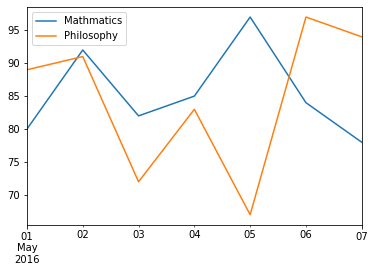

In [47]:
#날짜별로 그래프 그리기
exam.plot()

<AxesSubplot:>

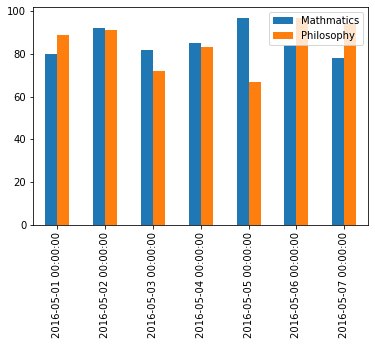

In [48]:
# Bar차트로 바꾸기
exam.plot(kind='bar')

In [49]:
#IMBD 영화리뷰데이터셋을 인터넷에서 불러오기
movies=pd.read_csv('http://bit.ly/imdbratings')
movies.head(6)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."


In [50]:
movies.shape

(979, 6)

#### 우리의 목표 : 영화상영시간이 200분 이상인 영화만 필터링해보자!

In [51]:
booleans = []
for length in movies.duration:
    if length>=200:
        booleans.append(True)
    else:
        booleans.append(False)

In [52]:
booleans

[False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fals

In [53]:
#데이터 프레임을 만들기전에 리스트를 Series로 변환
is_long = pd.Series(booleans)
is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [54]:
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [56]:
#조금 더 간단한 코드
is_long = movies.duration>=200
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [57]:
#is_long을 생성하지 않고 더 간단하게!
movies[movies.duration>=200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### 목표: 이번에는 장르가 'Chrime' 또는 'Action'인 영화 리스트 보기!

In [59]:
movies[(movies.genre=='Action')|(movies.genre=='Chrime')|(movies.genre=='Drama')].head(10)

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
16,8.7,One Flew Over the Cuckoo's Nest,R,Drama,133,"[u'Jack Nicholson', u'Louise Fletcher', u'Mich..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
19,8.7,Star Wars,PG,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
20,8.7,The Matrix,R,Action,136,"[u'Keanu Reeves', u'Laurence Fishburne', u'Car..."


In [58]:
#isin 메소드 사용
movies[movies.genre.isin(['Crime','Drama','Action'])].head(6)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."


##### 각 나라별 음주현황데이터 불러오기

In [60]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [63]:
drinks.shape

(193, 6)

In [73]:
drinks[(drinks.beer_servings>=150)&(drinks.wine_servings>=150)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,Europe
6,Argentina,193,25,221,8.3,South America
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe
16,Belgium,295,84,212,10.5,Europe
42,Croatia,230,87,254,10.2,Europe
48,Denmark,224,81,278,10.4,Europe
65,Germany,346,117,175,11.3,Europe
75,Hungary,234,215,185,11.3,Europe
81,Ireland,313,118,165,11.4,Europe


In [90]:
# 각 나라의 servings total 구하기
drinks['servings_total'] = drinks.loc[:,'beer_servings':'wine_servings'].sum(axis=1)
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,servings_total
0,Afghanistan,0,0,0,0.0,Asia,0
1,Albania,89,132,54,4.9,Europe,275
2,Algeria,25,0,14,0.7,Africa,39
3,Andorra,245,138,312,12.4,Europe,695
4,Angola,217,57,45,5.9,Africa,319
5,Antigua & Barbuda,102,128,45,4.9,North America,275
6,Argentina,193,25,221,8.3,South America,439
7,Armenia,21,179,11,3.8,Europe,211
8,Australia,261,72,212,10.4,Oceania,545
9,Austria,279,75,191,9.7,Europe,545


In [82]:
#conti가 같은 나라의 맥주 평균 소비량
conti = drinks[['beer_servings','continent']].groupby('continent').mean()
conti

,beer_servings
continent,
Africa,61.471698
Asia,37.045455
Europe,193.777778
North America,145.434783
Oceania,89.687500
South America,175.083333


<AxesSubplot:xlabel='continent'>

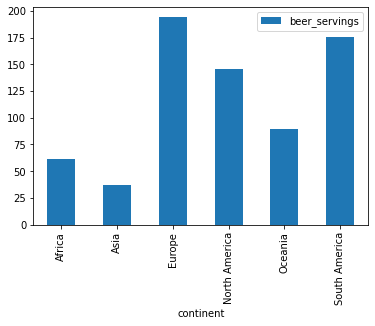

In [84]:
conti.plot(kind='bar')

In [76]:
conti = drinks[['wine_servings','continent']].groupby('continent').mean()
conti

,wine_servings
continent,
Africa,16.264151
Asia,9.068182
Europe,142.222222
North America,24.521739
Oceania,35.625000
South America,62.416667


In [91]:
#전체 데이터의 맥주 평균 소비량
drinks.beer_servings.mean()

106.16062176165804

In [92]:
#아프리카 대륙의 평균 소비량
drinks[drinks.continent=='Africa'].wine_servings.mean()

16.264150943396228

In [93]:
# 각 대륙별 맥주 평균 소비량 
    drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [94]:
#각 대륙별 맥주 최고 소비량
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [95]:
# 대륙별 평균, 최고,최소,다양한 통계치를 보고싶다
drinks.groupby('continent').beer_servings.agg(['count','mean','min','max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


<AxesSubplot:xlabel='continent'>

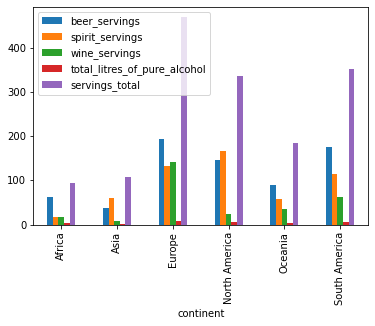

In [96]:
drinks.groupby('continent').mean().plot(kind='bar')